# Credit Card Default Prediction & Analysis

In [1]:
# Goal: Predict credit card default risk using clustering and machine learning

In [2]:
#  Phase 1: Data Understanding & Preprocessing

In [3]:
# 1. Download & Load Data (Load using pandas)
import pandas as pd
df = pd.read_csv('default_of_credit_card_clients.csv', skiprows=1)


In [4]:
# 2. Data Cleaning(Handle missing values,Convert categorical columns to proper labels (if needed) and Rename target column for simplicity)
df.rename(columns={'default payment next month': 'default'}, inplace=True)
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [5]:
# Phase 2: Clustering (Segmentation)

In [6]:
# 1. Scale Features
from sklearn.preprocessing import StandardScaler
X = df.drop('default', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 2. Apply KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

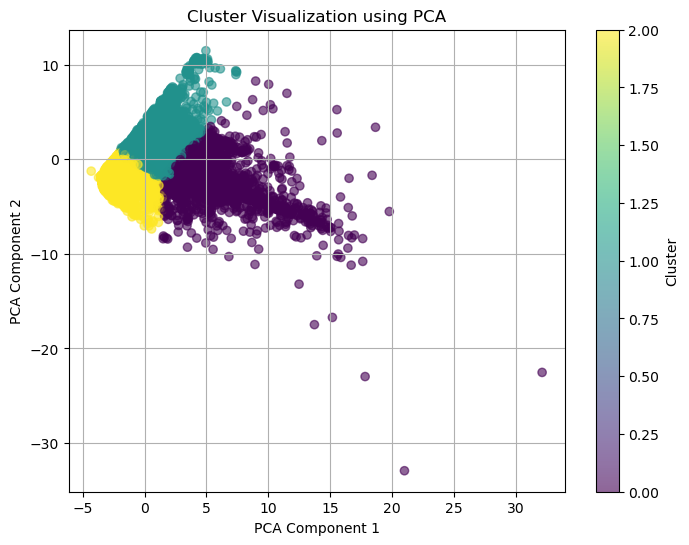

In [8]:
# 3. Visualize Clusters using PCA
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization using PCA')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


In [9]:
# Phase 3: Model Building (per cluster or global)

In [10]:
# 1.Split Dataset
from sklearn.model_selection import train_test_split
X = df.drop(['default'], axis=1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 2.Train Models
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# 3. Evaluate
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [13]:
# Phase 4: Save & Deploy Model
# 1. Save Model
import joblib
joblib.dump(model, 'credit_default_model.pkl')

['credit_default_model.pkl']

In [ ]:
# 2. Create Flask API
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('credit_default_model.pkl')

@app.route('/')
def home():
    return "Credit Default Prediction API is running."

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['features']
    prediction = model.predict([data])
    return jsonify({'default': int(prediction[0])})
